In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Kullanacağımız kütüphaneleri projeye dahil(import) ettik.

In [ ]:
netflix = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
df = netflix.copy()
df
# Bu kısımda veri setini projeye dahil ettik ve gerekli formata dönüştürme işlemlerini yaptık.
# Veri setinin bir kopyasını alarak olası problemlere karşı orijinal veri setini korumaya çalıştık.

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.head(10)
# Veri setine ilk bakış.

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [ ]:
df.info()
# Veri setindeki gözlemleri, değişkenleri ve değişken türlerini inceleyerek veri setini tanımaya çalıştık.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.shape
# Veri setindeki değişken ve gözlem sayılarını bulduk.

(584, 6)

In [ ]:
df.describe().T
# Veri setindeki numerik değişkenlerin istatistiksel değerlerini gözlemledik.

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


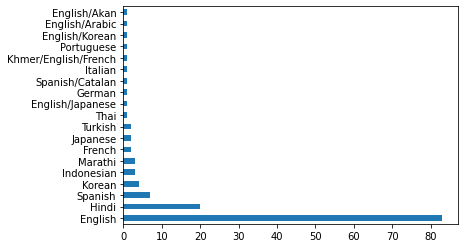

In [ ]:
df["Language"][(df["Runtime"] > 108)].value_counts().plot.barh();
# Runtime değeri %75'den büyük olan filmleri (Q3 Kartili ve sonrası) uzun soluklu olarak kabul ettik ve gerekli görselleştirmeyi yaptık.

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
df['Premiere'] =  pd.to_datetime(df['Premiere'])
df
# Object türünde olan veri tipini datetime olarak değiştirdik.

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


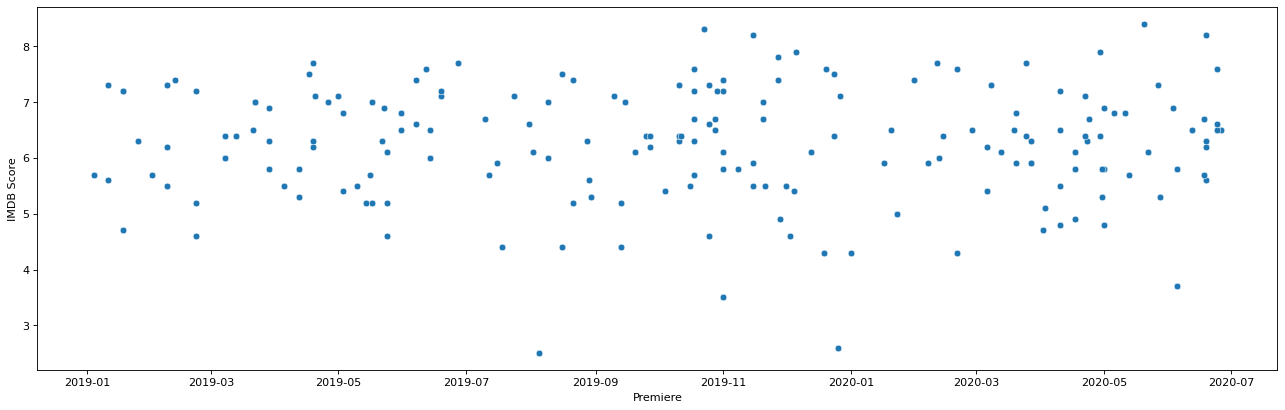

In [ ]:
dff= (df['Premiere'] > '2019-01-01') & (df['Premiere'] <= '2020-06-30')
df3=df.loc[dff]
df3[df3['Genre'] == 'Documentary']
plt.figure(figsize=(20, 6), dpi=80)
sns.scatterplot(x = 'Premiere',y = 'IMDB Score',data = df3);
# Scatterplot ile verilerimizi görselleştirdik.

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
df[(df["Language"] == "English") & (df["Genre"]) & ([df["IMDB Score"].max()])]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
14,Mercy,Thriller,2016-11-22,90,4.2,English
...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English


In [ ]:
df["Genre"][(df["Language"]=="English")&(df["IMDB Score"] == df["IMDB Score"].max())]

583    Documentary
Name: Genre, dtype: object

'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?


In [ ]:
df[(df["Language"] == "Hindi")&(df["Runtime"])]["Runtime"].mean()

122.07692307692308

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.


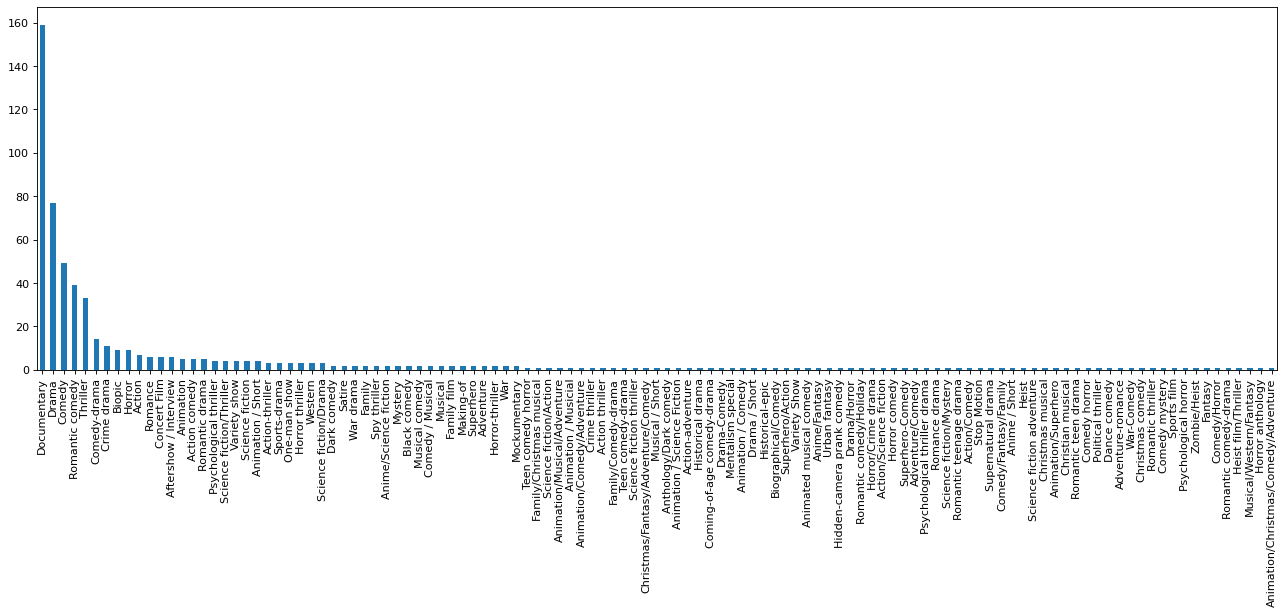

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
df["Genre"].value_counts().plot.bar();

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [ ]:
df["Language"].value_counts().nlargest(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [ ]:
df.nlargest(n=10, columns=['IMDB Score'])

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
571,13th,Documentary,2016-10-07,100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English


IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.


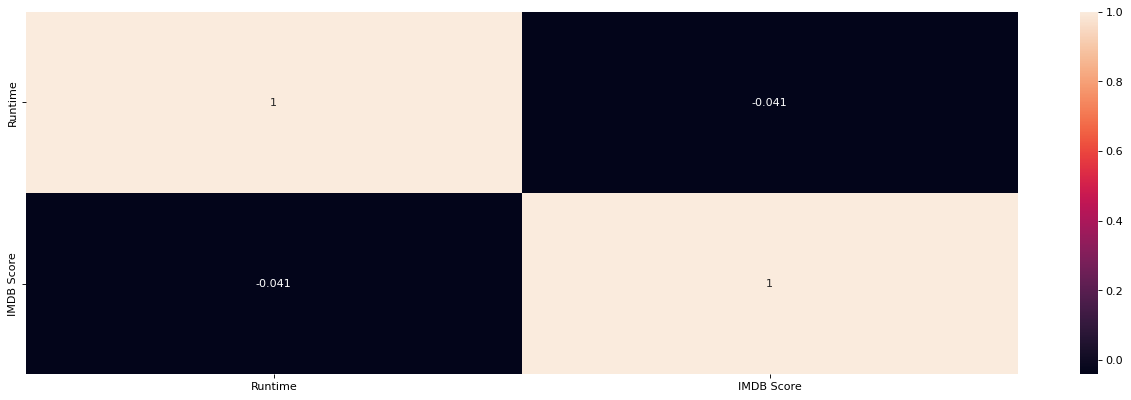

In [ ]:
core = df.corr()
plt.figure(figsize=(20, 6), dpi=80)
sns.heatmap(core,annot = True);
# IMDB puanı ve Runtime arasında herhangi bir korelasyonun olmadığını gördük. Ortaya çıkan korelasyon değeri 0'a yakın olduğundan herhangi bir korelasyondan bahsedilemez.

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.


In [ ]:
te= df.groupby(['Genre'])['IMDB Score'].sum()
te.sort_values(ascending = False)[0:10]

583     Documentary
582     Documentary
581    One-man show
578    Concert Film
579    Concert Film
580     Documentary
576     Documentary
577     Documentary
571     Documentary
572     Documentary
Name: Genre, dtype: object

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.


In [ ]:
df.nlargest(n=10, columns=['Runtime'])

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


Text(0.5, 1.0, 'Years with Counts')

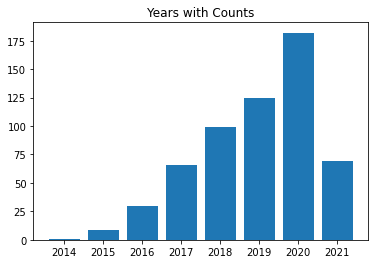

In [ ]:
fig , ax = plt.subplots()

year2021 = df.query('(Premiere < "2022-01-01" ) & (Premiere > "2021-01-01" )')
year2021 = year2021['Premiere'].value_counts().sum()

year2020 = df.query('(Premiere < "2021-01-01" ) & (Premiere > "2020-01-01" )')
year2020 = year2020['Premiere'].value_counts().sum()

year2019 = df.query('(Premiere < "2020-01-01" ) & (Premiere > "2019-01-01" )')
year2019 = year2019['Premiere'].value_counts().sum()

year2018 = df.query('(Premiere < "2019-01-01" ) & (Premiere > "2018-01-01" )')
year2018 = year2018['Premiere'].value_counts().sum()

year2017 = df.query('(Premiere < "2018-01-01") & (Premiere > "2017-01-01")')
year2017 = year2017['Premiere'].value_counts().sum()

year2016 = df.query('(Premiere < "2017-01-01") & (Premiere > "2016-01-01")')
year2016 = year2016['Premiere'].value_counts().sum()

year2015 = df.query('(Premiere < "2016-01-01") & (Premiere > "2015-01-01")')
year2015 = year2015['Premiere'].value_counts().sum()

year2014 = df.query('(Premiere < "2015-01-01") & (Premiere > "2014-01-01")')
year2014 = year2014['Premiere'].value_counts().sum()


#numbers =[year2021,year2020,year2019,year2018,year2017,year2016,year2015,year2014]
#years = [2021,2020,2019,2018,2017,2016,2015,2014]

ax.bar([2021,2020,2019,2018,2017,2016,2015,2014], [year2021,year2020,year2019,year2018,year2017,year2016,year2015,year2014])
ax.set_title("Years with Counts")

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.


Language
Malay    4.2
Name: IMDB Score, dtype: float64


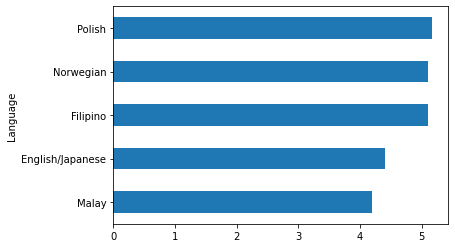

In [ ]:
low_language_imdb = df.groupby(['Language'])['IMDB Score'].mean().nsmallest(5)
low_language_imdb1 = df.groupby(['Language'])['IMDB Score'].mean().nsmallest(1)
print(low_language_imdb1)
low_language_imdb.plot.barh();

Hangi yılın toplam "runtime" süresi en fazladır?

Text(0.5, 1.0, 'Years with Runtimes')

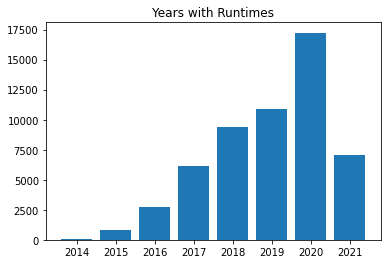

In [ ]:
fig , ax = plt.subplots()

year2021 = df.query('(Premiere < "2022-01-01" ) & (Premiere > "2021-01-01" )')
year2021 = year2021['Runtime'].sum()

year2020 = df.query('(Premiere < "2021-01-01" ) & (Premiere > "2020-01-01" )')
year2020 = year2020['Runtime'].sum()

year2019 = df.query('(Premiere < "2020-01-01" ) & (Premiere > "2019-01-01" )')
year2019 = year2019['Runtime'].sum()

year2018 = df.query('(Premiere < "2019-01-01" ) & (Premiere > "2018-01-01" )')
year2018 = year2018['Runtime'].sum()

year2017 = df.query('(Premiere < "2018-01-01") & (Premiere > "2017-01-01")')
year2017 = year2017['Runtime'].sum()

year2016 = df.query('(Premiere < "2017-01-01") & (Premiere > "2016-01-01")')
year2016 = year2016['Runtime'].sum()

year2015 = df.query('(Premiere < "2016-01-01") & (Premiere > "2015-01-01")')
year2015 = year2015['Runtime'].sum()

year2014 = df.query('(Premiere < "2015-01-01") & (Premiere > "2014-01-01")')
year2014 = year2014['Runtime'].sum()

ax.bar([2021,2020,2019,2018,2017,2016,2015,2014], [year2021,year2020,year2019,year2018,year2017,year2016,year2015,year2014])
ax.set_title("Years with Runtimes")

Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
df.groupby(['Language'])['Genre'].value_counts()

Language      Genre          
Bengali       Documentary          1
Dutch         Crime drama          1
              Fantasy              1
              Romantic comedy      1
English       Documentary        120
                                ... 
Thai          Horror               1
Thia/English  Documentary          1
Turkish       Comedy               2
              Drama                2
              Romance              1
Name: Genre, Length: 204, dtype: int64

Veri setinde outlier veri var mıdır? Açıklayınız.

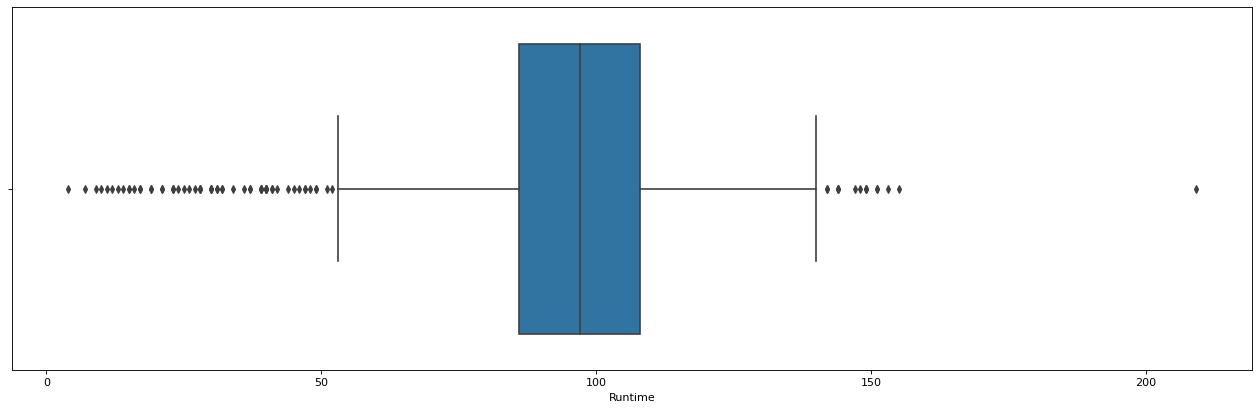

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
sns.boxplot(x = "Runtime",data = df);
# Boxplot grafiğinde her bir nokta outlier veriyi temsil eder.
# Veri setinde outlier veri bulunmaktadır. %25 (Q1 Kartil) aralığında oldukça fazla outlier veri bulunmaktadır. 
# Ayrıca Q3 kartilinde de outlier veriler söz konusu olmaktadır.

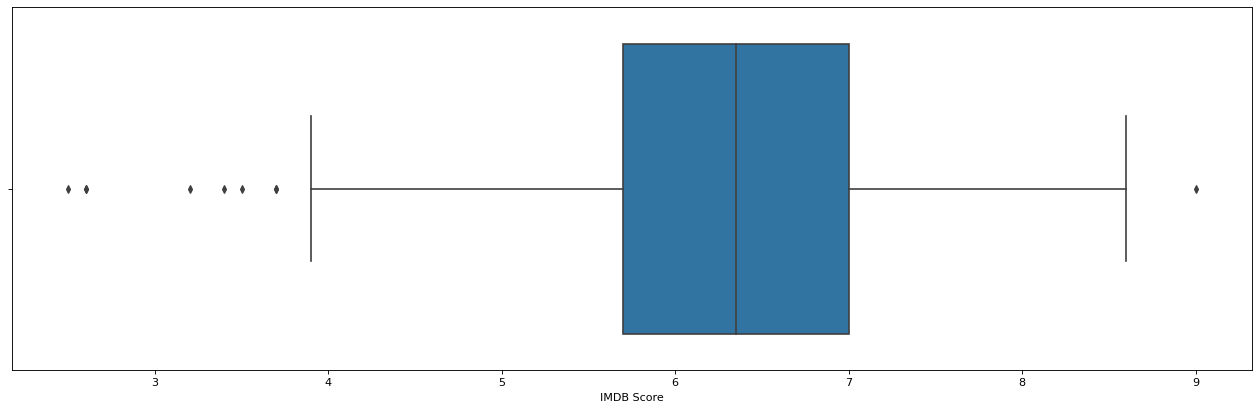

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
sns.boxplot(x = "IMDB Score",data = df);
# Boxplot grafiğinde her bir nokta outlier veriyi temsil eder.
# Özellikle Q1 kartilinde daha çok outlier veri bulunmaktadır.